In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Image data generator for testing data
test_datagen = ImageDataGenerator(
rescale=1.0/255
)

In [70]:
test_generator = test_datagen.flow_from_directory("C:/Users/vdg/Downloads/mnist-jpg/test/",
                                                 target_size=(28,28),
                                                  class_mode='categorical',
                                                 batch_size=20000)
train_generator = test_datagen.flow_from_directory("C:/Users/vdg/Downloads/mnist-jpg/train/",
                                                 target_size=(28,28),
                                                   class_mode='categorical',
                                                  batch_size=20000)

Found 10000 images belonging to 10 classes.
Found 60000 images belonging to 10 classes.


In [71]:
X_train,Y_train = train_generator[0]
X_test,Y_test = test_generator[0]

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [73]:
model = Sequential([
    keras.layers.Flatten(input_shape=(28,28,3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation="softmax")
])

In [74]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
history = model.fit(X_train,Y_train, epochs=4,validation_data=(X_test,Y_test))

Epoch 1/4
625/625 [==============================] - 7s 10ms/step - loss: 0.7269 - accuracy: 0.8194 - val_loss: 0.4053 - val_accuracy: 0.8929
Epoch 2/4
625/625 [==============================] - 5s 9ms/step - loss: 0.3780 - accuracy: 0.8964 - val_loss: 0.3299 - val_accuracy: 0.9103
Epoch 3/4
625/625 [==============================] - 6s 9ms/step - loss: 0.3221 - accuracy: 0.9108 - val_loss: 0.2928 - val_accuracy: 0.9161
Epoch 4/4
625/625 [==============================] - 5s 9ms/step - loss: 0.2901 - accuracy: 0.9187 - val_loss: 0.2737 - val_accuracy: 0.9218


In [76]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2737 - accuracy: 0.9218


[0.2736828625202179, 0.9218000173568726]

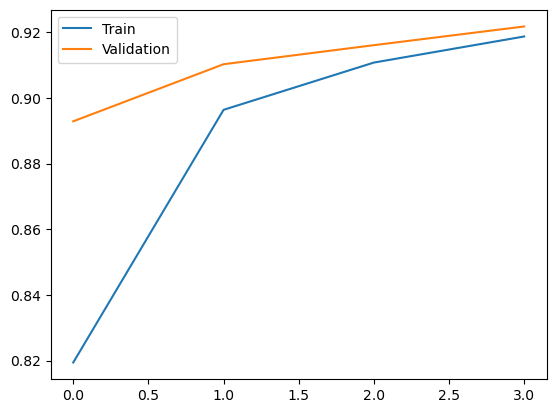

In [77]:
import matplotlib.pyplot as plt 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Validation'])